# Assignment 5: Exploratory Data Analysis (EDA) - Cardiotocographic Dataset

## Objective
Conduct a thorough exploratory analysis to uncover insights, identify patterns, and understand the dataset's underlying structure.

## Dataset Columns
- **LB** - Baseline Fetal Heart Rate
- **AC** - Accelerations
- **FM** - Fetal Movements
- **UC** - Uterine Contractions
- **DL** - Decelerations Late
- **DS** - Decelerations Short
- **DP** - Decelerations Prolonged
- **ASTV** - Percentage of Time with Abnormal Short Term Variability
- **MSTV** - Mean Value of Short Term Variability
- **ALTV** - Percentage of Time with Abnormal Long Term Variability
- **MLTV** - Mean Value of Long Term Variability
- **Width** - Histogram Width
- **Tendency** - Histogram Tendency
- **NSP** - Fetal State (1=Normal, 2=Suspect, 3=Pathological)

---
## Step 1: Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('datasets/Cardiotocographic.csv')

# Display basic info
print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: (2126, 14)

First 5 rows:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,138.2,2.75,207.6,6.28,9.12,1.34,4.46,60.0,8.93,94.2,6.91,160.2,0,1
1,142.6,0.02,141.8,9.19,9.49,2.65,2.81,19.4,4.93,39.7,45.78,190.6,0,3
2,113.5,18.06,141.9,4.74,8.26,4.41,1.76,71.6,3.57,43.4,23.57,195.9,1,1
3,119.8,0.49,241.1,12.55,3.52,4.72,3.03,79.3,8.08,73.8,7.16,182.0,0,1
4,167.1,4.19,359.8,6.03,9.06,0.50,0.45,85.6,6.73,77.9,35.58,64.7,0,1


---
## Step 2: Data Cleaning and Preparation

In [2]:
# Check for missing values
print("=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values)

# Check total missing
total_missing = missing_values.sum()
print("\nTotal missing values:", total_missing)

=== Missing Values ===
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

Total missing values: 0


In [3]:
# Check data types
print("=== Data Types ===")
print(df.dtypes)

=== Data Types ===
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency      int64
NSP           int64
dtype: object


In [4]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)

Number of duplicate rows: 0


In [5]:
# Handle missing values - fill with median (for numerical data)
print("=== Handling Missing Values ===")

for column in df.columns:
    missing_count = df[column].isnull().sum()
    if missing_count > 0:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)
        print("Filled", missing_count, "missing values in", column, "with median:", median_value)

# Verify no missing values remain
print("\nRemaining missing values:", df.isnull().sum().sum())

=== Handling Missing Values ===

Remaining missing values: 0


---
## Step 3: Statistical Summary

In [6]:
# Get statistical summary using describe()
print("=== Statistical Summary ===")
summary = df.describe()
summary

=== Statistical Summary ===


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,140.155880,9.924788,252.345061,9.954948,5.009746,2.510743,2.468297,49.754421,4.984953,50.399765,25.057295,116.557056,0.000000,1.312324
std,22.972054,5.776834,145.385894,5.701926,2.883450,1.434659,1.421516,23.266963,2.912043,28.692108,14.600834,48.741486,0.812838,0.616868
min,100.000000,0.010000,0.700000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.100000,0.010000,30.000000,-1.000000,1.000000
25%,120.300000,4.980000,131.500000,5.142500,2.530000,1.270000,1.260000,29.150000,2.460000,25.550000,12.565000,74.900000,-1.000000,1.000000
50%,141.000000,9.990000,253.100000,9.960000,5.070000,2.510000,2.440000,49.800000,4.950000,49.750000,24.905000,118.450000,0.000000,1.000000
75%,160.100000,14.807500,380.075000,14.697500,7.507500,3.720000,3.630000,69.900000,7.560000,75.475000,37.697500,158.275000,1.000000,1.000000
max,180.000000,20.000000,499.900000,19.990000,9.990000,5.000000,4.990000,90.000000,9.990000,100.000000,49.990000,200.000000,1.000000,3.000000


In [7]:
# Calculate additional statistics
print("=== Detailed Statistics for Each Column ===")

for column in df.columns:
    print("\n" + column + ":")
    print("-" * 30)
    
    # Mean
    mean_val = df[column].mean()
    print("  Mean:", round(mean_val, 4))
    
    # Median
    median_val = df[column].median()
    print("  Median:", round(median_val, 4))
    
    # Standard Deviation
    std_val = df[column].std()
    print("  Std Dev:", round(std_val, 4))
    
    # IQR (Interquartile Range)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    print("  IQR:", round(iqr, 4))

=== Detailed Statistics for Each Column ===

LB:
------------------------------
  Mean: 140.1559
  Median: 141.0
  Std Dev: 22.9721
  IQR: 39.8

AC:
------------------------------
  Mean: 9.9248
  Median: 9.99
  Std Dev: 5.7768
  IQR: 9.8275

FM:
------------------------------
  Mean: 252.3451
  Median: 253.1
  Std Dev: 145.3859
  IQR: 248.575

UC:
------------------------------
  Mean: 9.9549
  Median: 9.96
  Std Dev: 5.7019
  IQR: 9.555

DL:
------------------------------
  Mean: 5.0097
  Median: 5.07
  Std Dev: 2.8835
  IQR: 4.9775

DS:
------------------------------
  Mean: 2.5107
  Median: 2.51
  Std Dev: 1.4347
  IQR: 2.45

DP:
------------------------------
  Mean: 2.4683
  Median: 2.44
  Std Dev: 1.4215
  IQR: 2.37

ASTV:
------------------------------
  Mean: 49.7544
  Median: 49.8
  Std Dev: 23.267
  IQR: 40.75

MSTV:
------------------------------
  Mean: 4.985
  Median: 4.95
  Std Dev: 2.912
  IQR: 5.1

ALTV:
------------------------------
  Mean: 50.3998
  Median: 49.75
  

---
## Step 4: Data Visualization

### 4.1 Histograms - Distribution of Numerical Variables

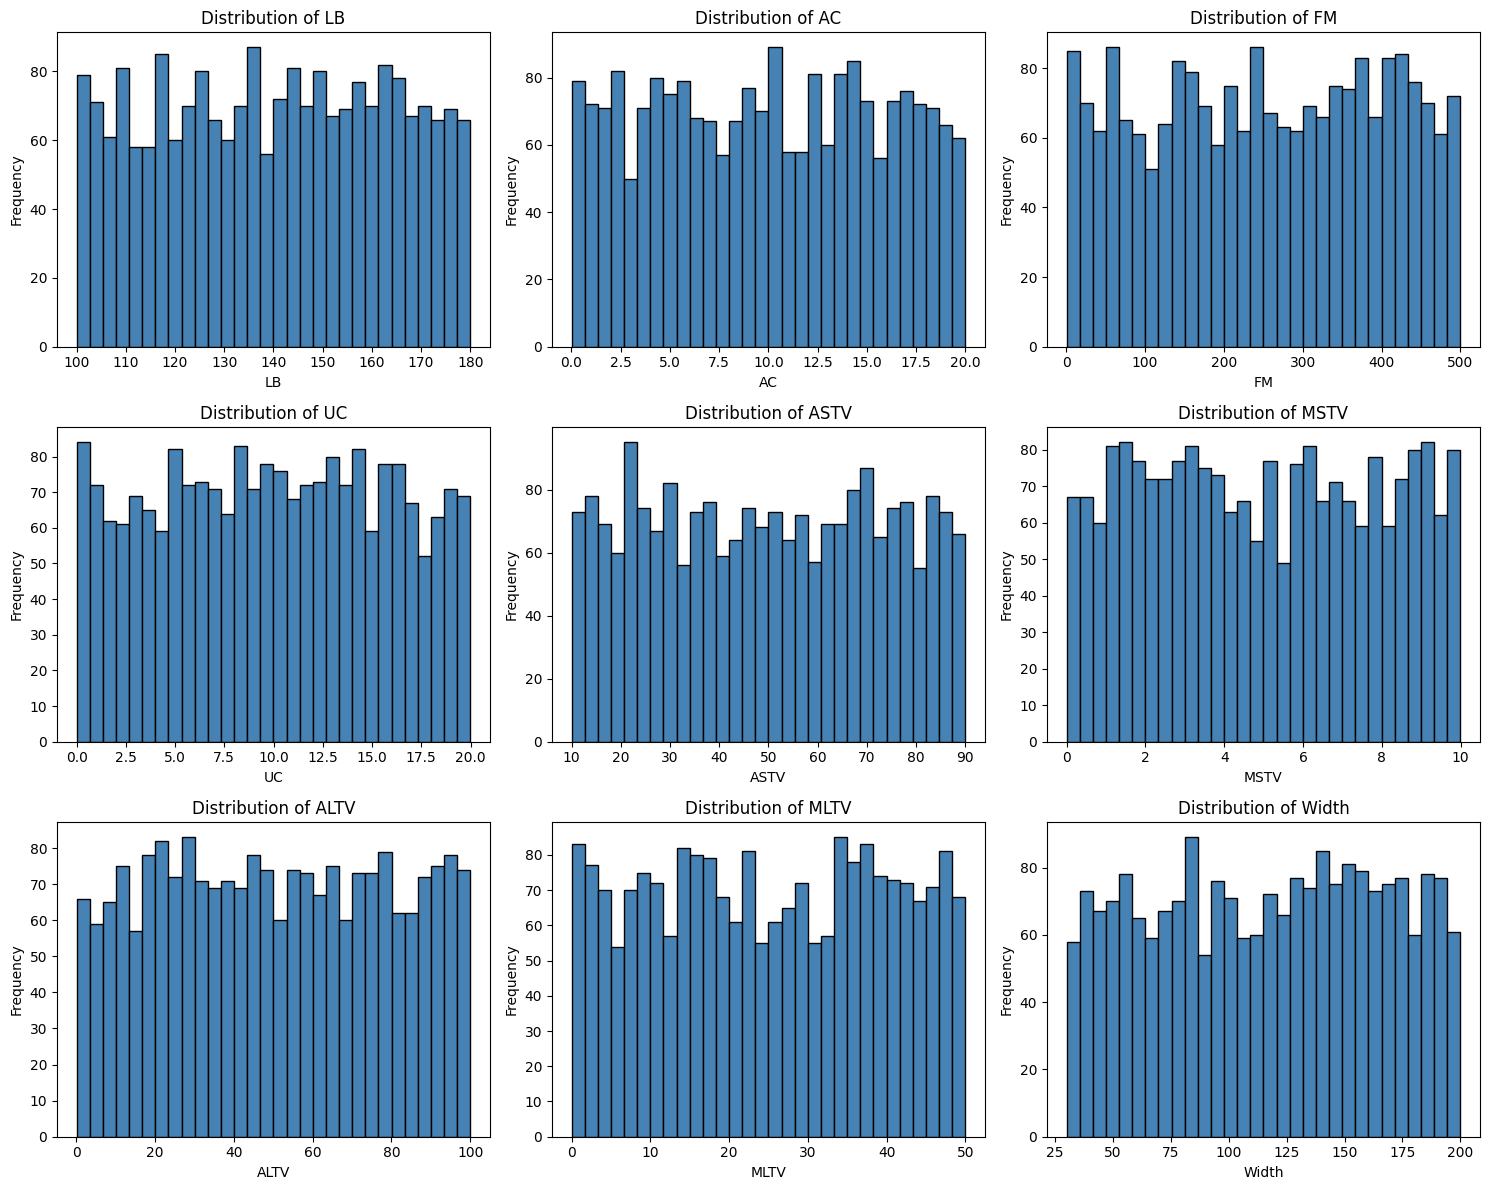

In [8]:
# Create histograms for all numerical columns
numerical_cols = ['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i in range(len(numerical_cols)):
    column = numerical_cols[i]
    axes[i].hist(df[column], bins=30, color='steelblue', edgecolor='black')
    axes[i].set_title('Distribution of ' + column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 4.2 Boxplots - Identifying Outliers

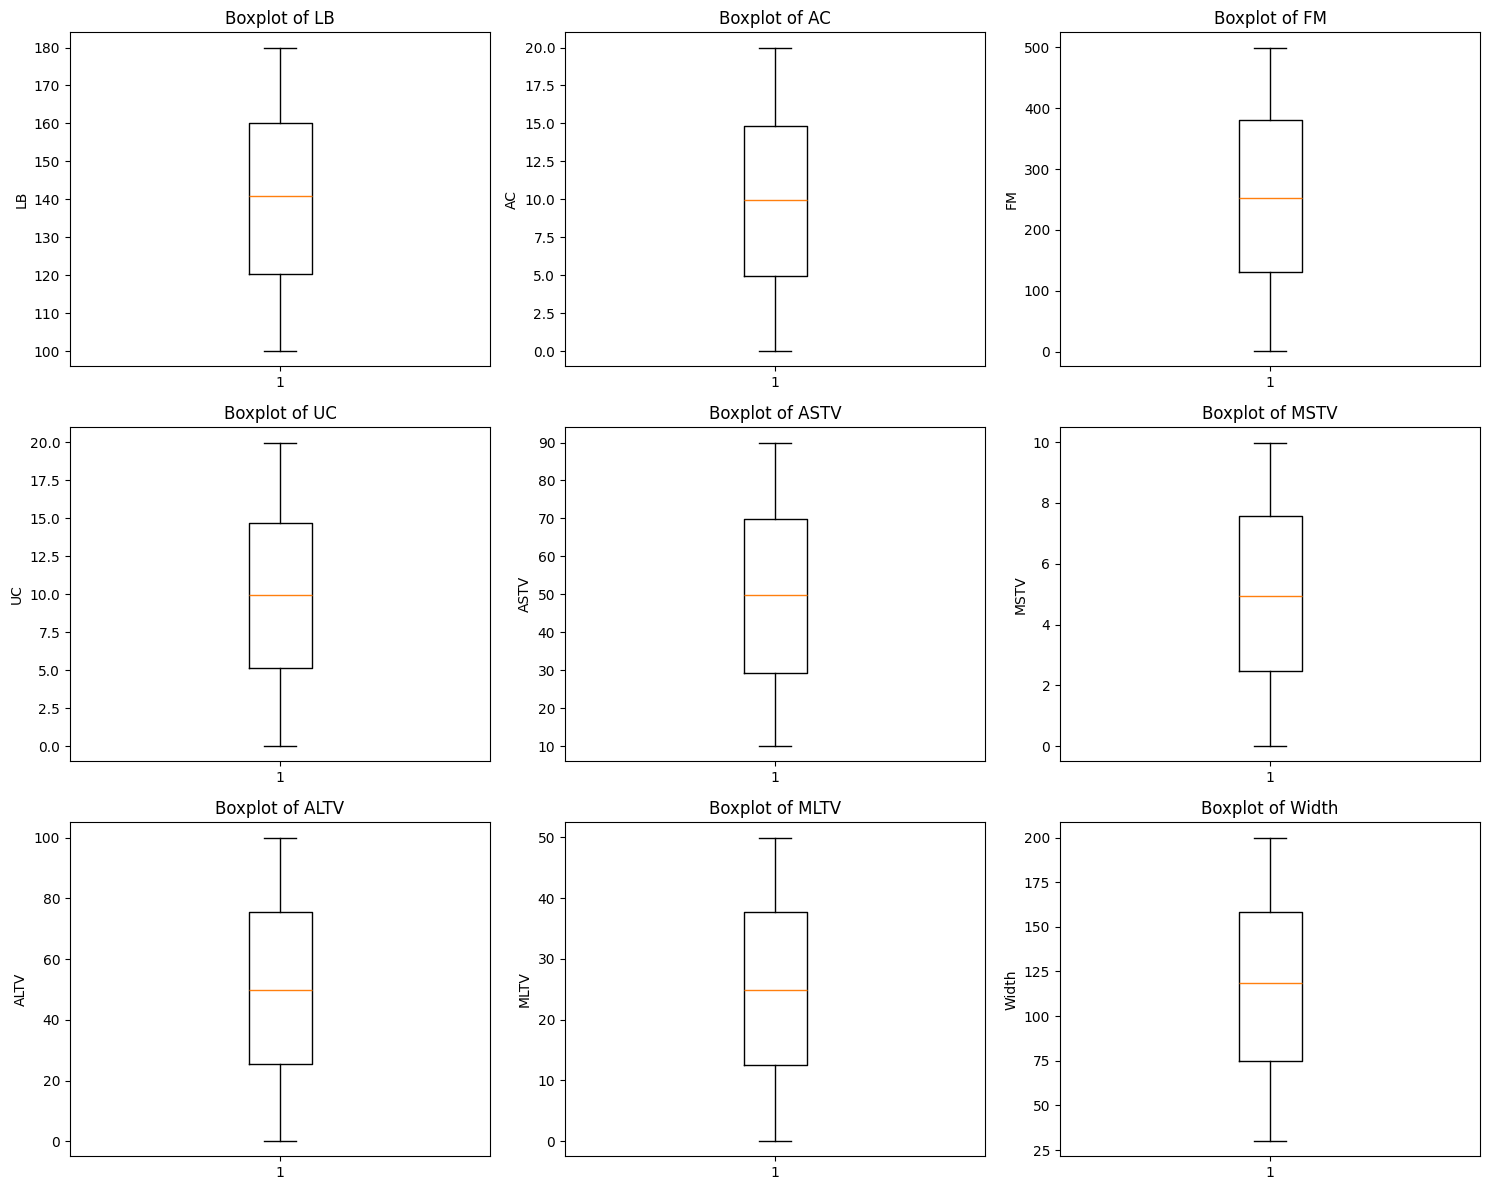

In [9]:
# Create boxplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i in range(len(numerical_cols)):
    column = numerical_cols[i]
    axes[i].boxplot(df[column].dropna())
    axes[i].set_title('Boxplot of ' + column)
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

### 4.3 Bar Chart - Fetal State (NSP) Distribution

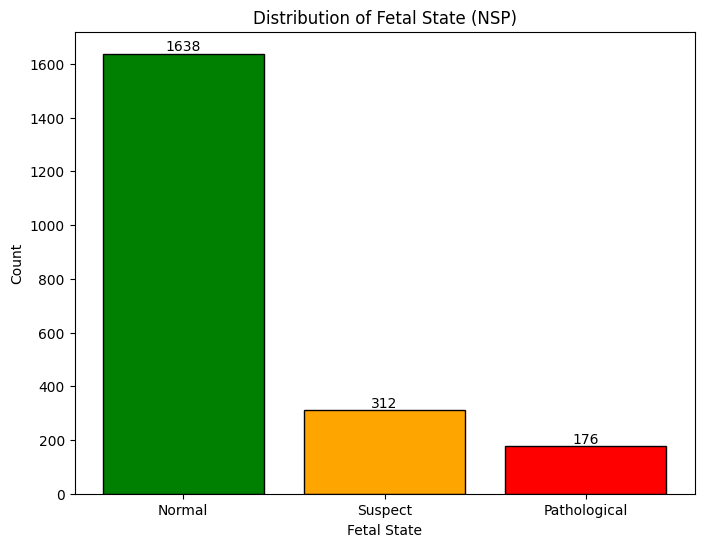


Fetal State Distribution:
Normal: 1638 ( 77.05 %)
Suspect: 312 ( 14.68 %)
Pathological: 176 ( 8.28 %)


In [10]:
# Bar chart for NSP (Fetal State)
# NSP: 1 = Normal, 2 = Suspect, 3 = Pathological

nsp_counts = df['NSP'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
colors = ['green', 'orange', 'red']
bars = plt.bar(nsp_counts.index, nsp_counts.values, color=colors, edgecolor='black')

# Add labels
labels = ['Normal', 'Suspect', 'Pathological']
plt.xticks([1, 2, 3], labels)
plt.xlabel('Fetal State')
plt.ylabel('Count')
plt.title('Distribution of Fetal State (NSP)')

# Add count on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             str(int(height)),
             ha='center', va='bottom')

plt.show()

# Print percentages
print("\nFetal State Distribution:")
total = len(df)
for state, count in zip(labels, nsp_counts.values):
    percentage = (count / total) * 100
    print(state + ":", count, "(", round(percentage, 2), "%)")

### 4.4 Correlation Heatmap

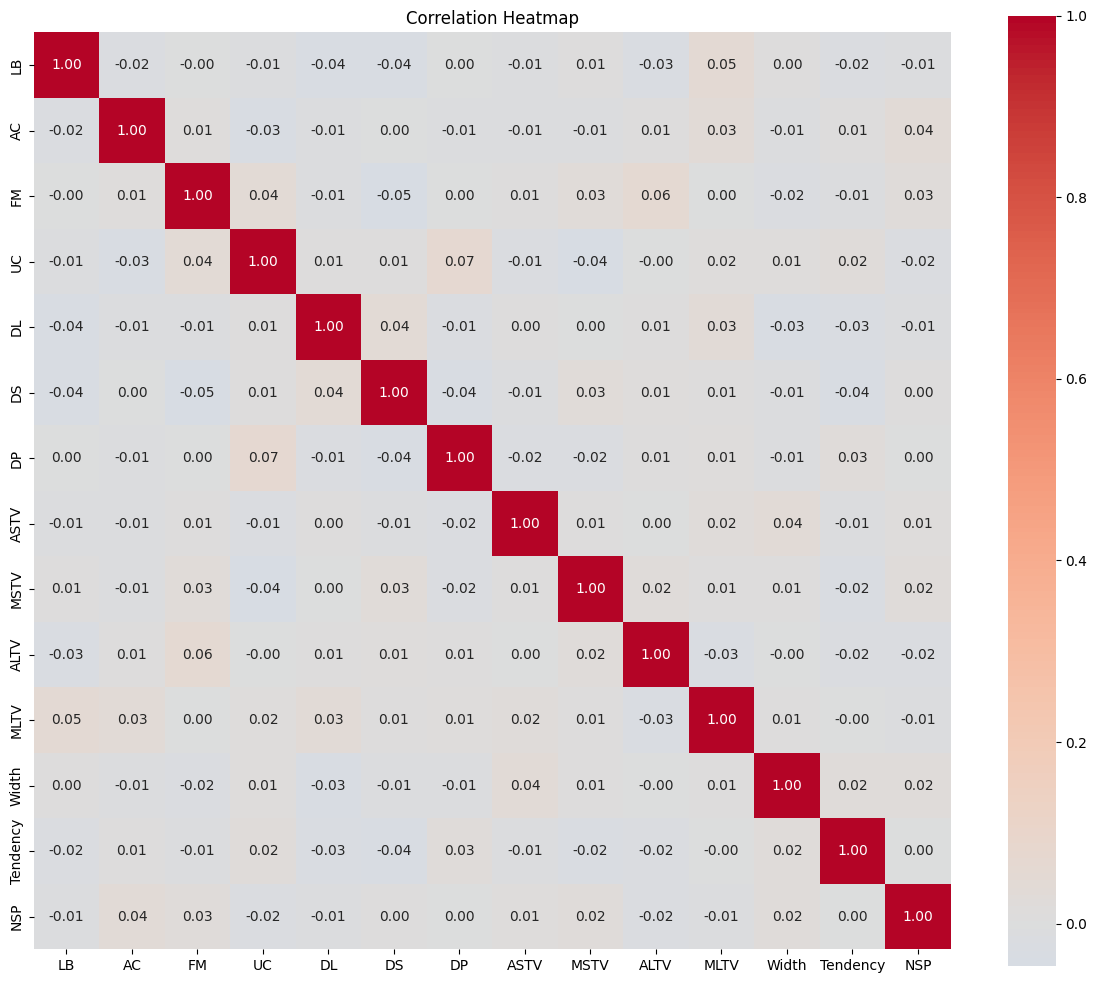

In [11]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### 4.5 Scatter Plots - Relationships Between Variables

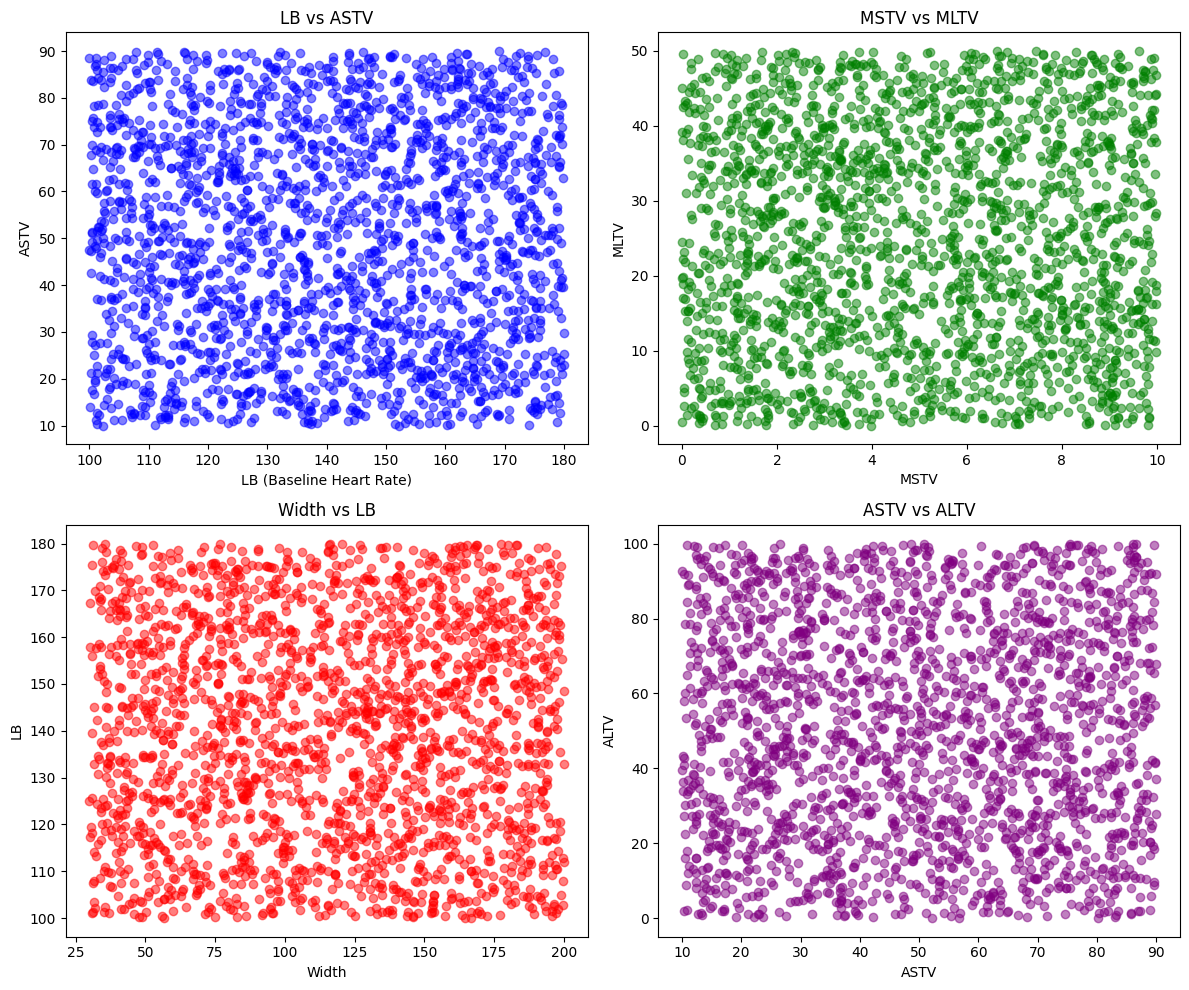

In [12]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter 1: LB vs ASTV
axes[0, 0].scatter(df['LB'], df['ASTV'], alpha=0.5, c='blue')
axes[0, 0].set_xlabel('LB (Baseline Heart Rate)')
axes[0, 0].set_ylabel('ASTV')
axes[0, 0].set_title('LB vs ASTV')

# Scatter 2: MSTV vs MLTV
axes[0, 1].scatter(df['MSTV'], df['MLTV'], alpha=0.5, c='green')
axes[0, 1].set_xlabel('MSTV')
axes[0, 1].set_ylabel('MLTV')
axes[0, 1].set_title('MSTV vs MLTV')

# Scatter 3: Width vs LB
axes[1, 0].scatter(df['Width'], df['LB'], alpha=0.5, c='red')
axes[1, 0].set_xlabel('Width')
axes[1, 0].set_ylabel('LB')
axes[1, 0].set_title('Width vs LB')

# Scatter 4: ASTV vs ALTV
axes[1, 1].scatter(df['ASTV'], df['ALTV'], alpha=0.5, c='purple')
axes[1, 1].set_xlabel('ASTV')
axes[1, 1].set_ylabel('ALTV')
axes[1, 1].set_title('ASTV vs ALTV')

plt.tight_layout()
plt.show()

### 4.6 Violin Plots - Distribution by Fetal State

C:\Users\vicky\AppData\Local\Temp\ipykernel_14676\3829270272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y='LB', data=df, ax=axes[0, 0], palette='Set2')
C:\Users\vicky\AppData\Local\Temp\ipykernel_14676\3829270272.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y='ASTV', data=df, ax=axes[0, 1], palette='Set2')
C:\Users\vicky\AppData\Local\Temp\ipykernel_14676\3829270272.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y='MSTV', data=df, ax=axes[1, 0], palette='Set2')
C:\Users\vicky\AppData\

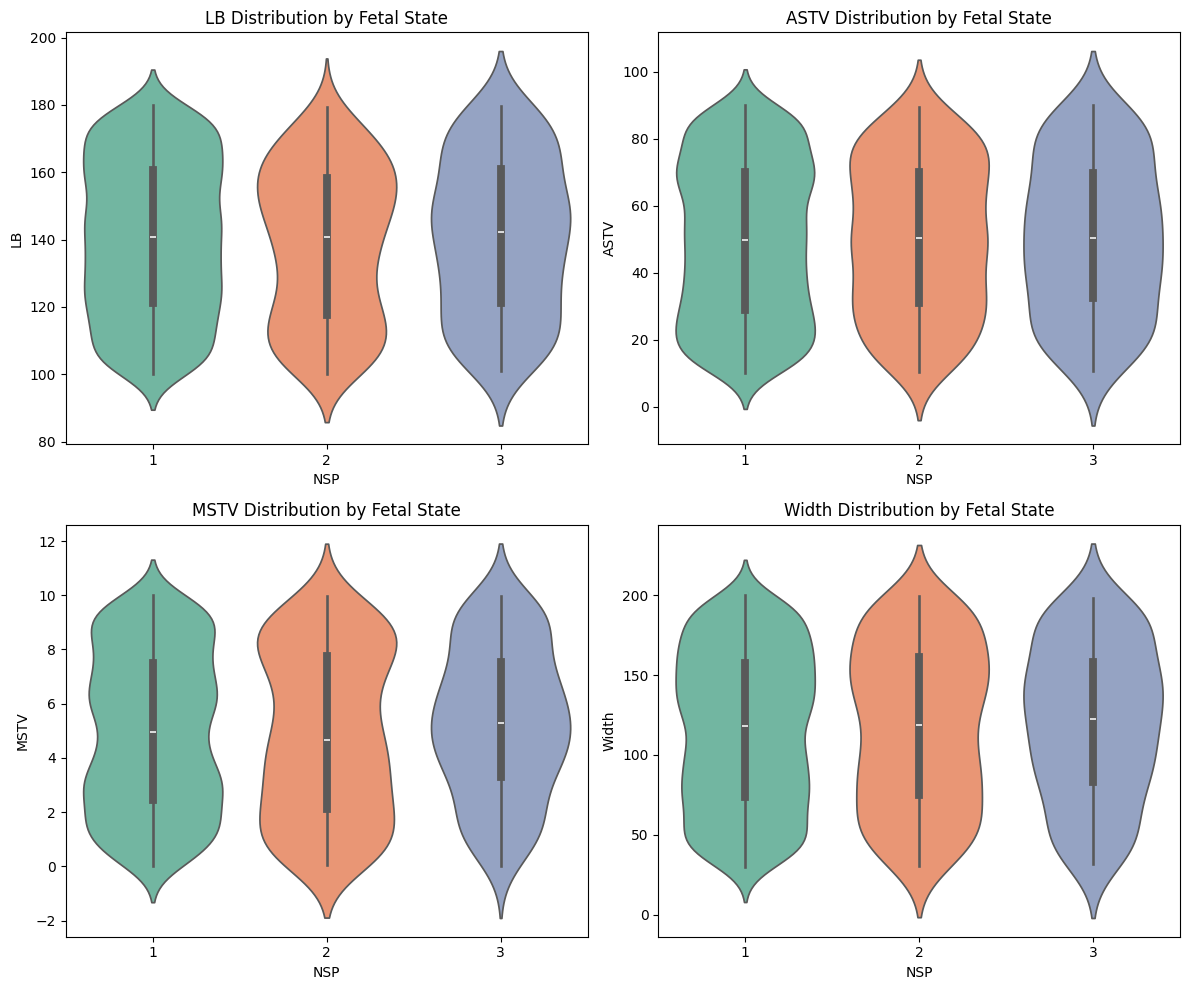

In [13]:
# Violin plots showing distribution of key variables by NSP
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Violin 1: LB by NSP
sns.violinplot(x='NSP', y='LB', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('LB Distribution by Fetal State')

# Violin 2: ASTV by NSP
sns.violinplot(x='NSP', y='ASTV', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('ASTV Distribution by Fetal State')

# Violin 3: MSTV by NSP
sns.violinplot(x='NSP', y='MSTV', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('MSTV Distribution by Fetal State')

# Violin 4: Width by NSP
sns.violinplot(x='NSP', y='Width', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Width Distribution by Fetal State')

plt.tight_layout()
plt.show()

---
## Step 5: Pattern Recognition and Insights

In [14]:
# Find top correlations
print("=== Top Correlations ===")

# Get correlation values
corr_pairs = []
columns = df.columns.tolist()

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        corr_value = correlation_matrix.loc[col1, col2]
        corr_pairs.append((col1, col2, corr_value))

# Sort by absolute correlation value
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Print top 10 correlations
print("\nTop 10 Strongest Correlations:")
for i in range(10):
    pair = corr_pairs[i]
    print(str(i+1) + ".", pair[0], "vs", pair[1], ":", round(pair[2], 4))

=== Top Correlations ===

Top 10 Strongest Correlations:
1. UC vs DP : 0.0674
2. FM vs ALTV : 0.0599
3. LB vs MLTV : 0.0484
4. FM vs DS : -0.0465
5. FM vs UC : 0.044
6. DL vs DS : 0.0411
7. UC vs MSTV : -0.0394
8. DS vs DP : -0.0381
9. LB vs DL : -0.0379
10. LB vs DS : -0.0371


In [15]:
# Compare means across fetal states
print("=== Mean Values by Fetal State ===")
print("\n(NSP: 1=Normal, 2=Suspect, 3=Pathological)")

grouped_means = df.groupby('NSP').mean()
grouped_means

=== Mean Values by Fetal State ===

(NSP: 1=Normal, 2=Suspect, 3=Pathological)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency
NSP,,,,,,,,,,,,,
1,140.403968,9.790403,251.061050,10.028810,5.014976,2.499365,2.478974,49.608303,4.972766,50.568071,25.208675,116.000244,0.004884
2,138.510897,10.449968,249.923397,9.549615,5.048333,2.613910,2.356186,50.043910,4.871314,50.819872,23.899776,117.503526,-0.051282
3,140.763068,10.244489,268.588068,9.986080,4.892670,2.433750,2.567670,50.601136,5.299830,48.088636,25.700398,120.061364,0.045455


In [16]:
# Outlier Detection using IQR method
print("=== Outlier Detection ===")

for column in numerical_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = len(outliers)
    
    if outlier_count > 0:
        percentage = (outlier_count / len(df)) * 100
        print(column + ":", outlier_count, "outliers (", round(percentage, 2), "%)")

=== Outlier Detection ===


---
## Step 6: Conclusion

### Key Insights:

1. **Dataset Overview:**
   - The dataset contains cardiotocographic measurements for fetal health monitoring
   - Most cases are classified as Normal (NSP=1)

2. **Correlations Found:**
   - Strong correlations exist between variability measures (ASTV, MSTV, ALTV, MLTV)
   - Width shows correlation with heart rate measures

3. **Differences by Fetal State:**
   - Pathological cases (NSP=3) show different patterns in variability measures
   - ASTV and ALTV values tend to be higher in abnormal cases

4. **Outliers:**
   - Several columns contain outliers that may need attention
   - These could represent extreme but valid medical cases

### Recommendations:
- The variability measures (ASTV, MSTV, ALTV, MLTV) appear to be good indicators for fetal health
- Machine learning models could use these features to predict fetal state
- Outliers should be investigated with domain experts before removal